# Colocar ano desejado, e mês inical deste ano

Scrip usado para baixar valores das cotas de fundos de investimentos, conforme CNPJ's descritos no código.

Ao executar, o programa pede ano e mês, que serão usados como base para a busca e elaboração da planilha com os dados desejados.

IMPORTANTE: Programa captura os dados do ano informando, do mês inserido como parâmetro até o último do anos. Para o ano atual, ele considera como último mês o atual.

In [1]:
%%time

# Importando as bibliotecas que serão utilizadas no código

import pandas as pd
import numpy as np
import requests
from datetime import datetime as dt
from io import BytesIO
import zipfile
import os


# Solicitação dos dados iniciais para a busca pelos fundos

ano = int(input('Digite o ano: '))
mes = int(input('Digite o mês: '))

# Criação do dataframe que irá armazenar os dados obtidos

fundos = pd.DataFrame()

# Dicionário que irá converter o mês de int para o formato MM, pois o endereço de captura das informações
# está assim. Ex.: inf_diario_fi_202101.zip

mes_formatado = {1: '01', 
                 2: '02', 
                 3: '03', 
                 4: '04', 
                 5: '05', 
                 6: '06', 
                 7: '07', 
                 8: '08', 
                 9: '09',
                 10: '10', 
                 11: '11', 
                 12: '12'}

# Filtro para selecionar os CNPJ's dos fundos desejados.
# Deve ser alterado sempre que houver alteração na carteira de fundos.
# Necessário limitar pelos fundos desejados para que a base não seja muito grande e deixe o desempenho ruim

filtro = ['03.187.084/0001-02', 
          '16.916.063/0001-22', 
          '07.214.377/0001-92', 
          '02.506.721/0001-01']


# Função para baixar o arquivo com os dados dos fundos.
# Importante mencionar que atualmente (01/06/2022) o arquivo com os dados está dentro de um zip,
# necessário retirar deste para efetuar a leitura.

def baixarRelatorio(ano, mes):
    url = f'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{ano}{mes_formatado[mes]}.zip'
    arquivo_url = BytesIO(requests.get(url).content)

    try:
        arquivo_zipado = zipfile.ZipFile(arquivo_url)
        arquivo_zipado.extractall('./Base_cotas')
        arquivo_csv = f'C:/Users/thiago.cunha/Documents/Python/Cotas fundos/Base_cotas/inf_diario_fi_{ano}{mes_formatado[mes]}.csv'

    except:
        print(f'Mês {mes} não contém arquivo.')
        pass
    else:
        fundo = pd.read_csv(arquivo_csv, sep=';')
        fundo = fundo[fundo.CNPJ_FUNDO.isin(filtro)]
        global fundos 
        fundos = pd.concat([fundos, fundo])  
        

# Loop while para verificar se o ano digitado pelo usuário é menor que 2018 ou
# maior que o ano atual.
#Caso verdadeiro, pede novamente o ano, até que atenda os requisitos.
        
while 2018 > ano or ano > dt.today().year:
    print('O ano precisa ser menor ou igual ao atual.')
    ano = int(input('Digite o ano: '))
    

# Efetua verificação do ano, se menor que o atual, captura os dados do do mês inserido
# em diante, até o fim do ano.
# Do contrário, captura os dados do a partir do mês desejado até a data atual.

# Este loop será melhorado para capturar dados a partir do mês e ano inseridos até a atual.
    
if ano == dt.today().year:
    for mes in range(mes, dt.today().month + 1):
        print(dt.today().time())
        print(str(mes) + '/' + str(ano))
        baixarRelatorio(ano, mes)
        
else:
    for mes in range(mes, 13):
        print(dt.today().time())
        print(str(mes) + '/' + str(ano))
        baixarRelatorio(ano, mes)


# Cria coluna concatenando CNPJ e data, para que seja possível puxar o dado para a planilha de apresentação.

fundos['CPNJ_data'] = fundos.CNPJ_FUNDO + pd.to_datetime(fundos.DT_COMPTC).dt.strftime('%d/%m/%Y')

# Cria uma lista com os nomes das colunas do dataframe, alterando a ordem.

x = [fundos.columns[-1]]
x[1:] = fundos.columns[0:-1].to_list()

# Altera a ordem das colunas, para que a CNPJ_data seja a primeira coluna do dataframe.
# Isso se faz necessário para que o PROCV para a planilha de apresentação funcione.

fundos = fundos.reindex(columns=x)

# Salva o dataframe em formato Excel

fundos.to_excel(f'C:/Users/thiago.cunha/Documents/Python/Cotas fundos/cotas_fundos.xlsx', index=False)
print('Download completo!')

Digite o ano: 2022
Digite o mês: 1
14:11:26.712737
1/2022
14:11:39.939059
2/2022
14:12:13.703435
3/2022
14:12:24.914557
4/2022
14:12:35.602625
5/2022
14:12:41.231188
6/2022
Mês 6 não contém arquivo.
Download completo!
Wall time: 1min 32s


In [2]:
fundos.head()

,CPNJ_data,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
6319,02.506.721/0001-0103/01/2022,FI,02.506.721/0001-01,2022-01-03,8.497898e+09,13.566024,8.497728e+09,7.541544e+07,9.816741e+07,323
6320,02.506.721/0001-0104/01/2022,FI,02.506.721/0001-01,2022-01-04,8.588447e+09,13.570415,8.588275e+09,2.638330e+08,1.760356e+08,328
6321,02.506.721/0001-0105/01/2022,FI,02.506.721/0001-01,2022-01-05,8.589749e+09,13.574888,8.589576e+09,5.850866e+07,6.003939e+07,331
6322,02.506.721/0001-0106/01/2022,FI,02.506.721/0001-01,2022-01-06,8.642261e+09,13.579365,8.642087e+09,9.387295e+07,4.419510e+07,329
6323,02.506.721/0001-0107/01/2022,FI,02.506.721/0001-01,2022-01-07,8.908886e+09,13.583796,8.908705e+09,3.232276e+08,5.942846e+07,337


Text(0.5, 1.0, '02.506.721/0001-01')

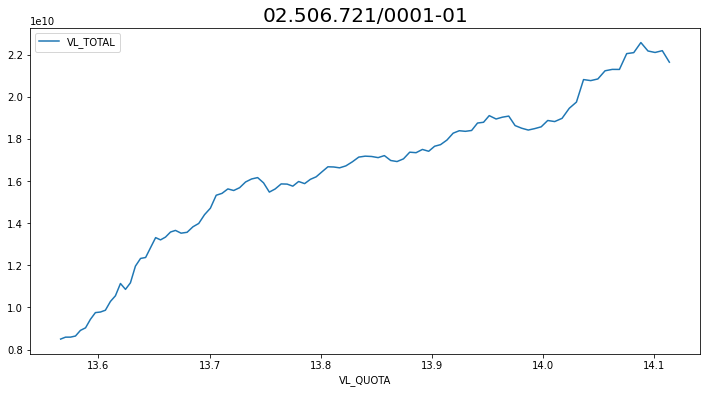

In [3]:
graf1 = fundos[fundos.CNPJ_FUNDO == fundos.CNPJ_FUNDO.unique()[0]].plot.line(x = 'VL_QUOTA', y = 'VL_TOTAL', figsize = (12, 6))
graf1.set_title(f'{fundos.CNPJ_FUNDO.unique()[0]}', fontsize = 20)

Text(0.5, 1.0, '03.187.084/0001-02')

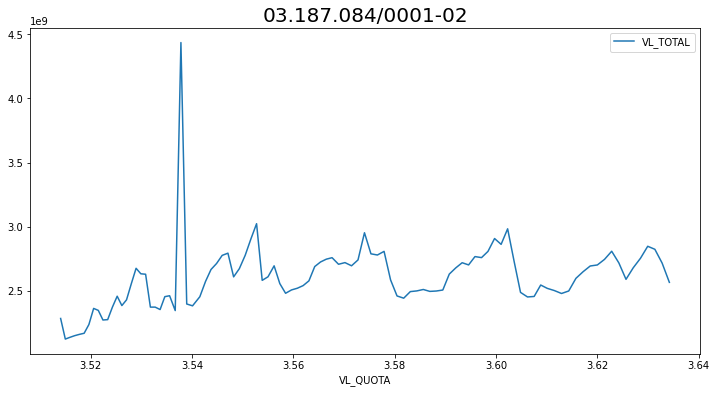

In [4]:
graf2 = fundos[fundos.CNPJ_FUNDO == fundos.CNPJ_FUNDO.unique()[1]].plot.line(x = 'VL_QUOTA', y = 'VL_TOTAL', figsize = (12, 6))
graf2.set_title(f'{fundos.CNPJ_FUNDO.unique()[1]}', fontsize = 20)

Text(0.5, 1.0, '07.214.377/0001-92')

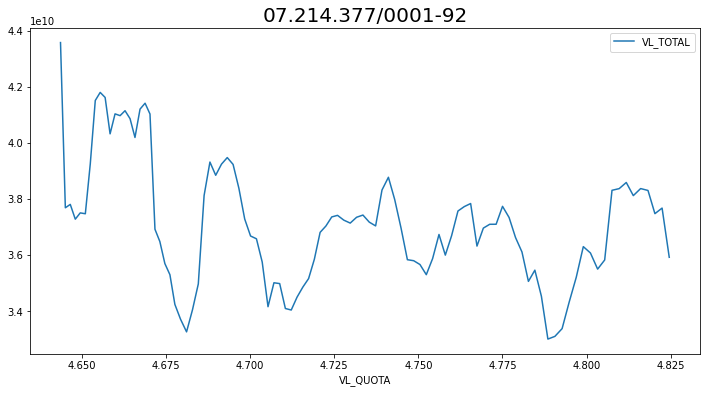

In [5]:
graf3 = fundos[fundos.CNPJ_FUNDO == fundos.CNPJ_FUNDO.unique()[2]].plot.line(x = 'VL_QUOTA', y = 'VL_TOTAL', figsize = (12, 6))
graf3.set_title(f'{fundos.CNPJ_FUNDO.unique()[2]}', fontsize = 20)

Text(0.5, 1.0, '16.916.063/0001-22')

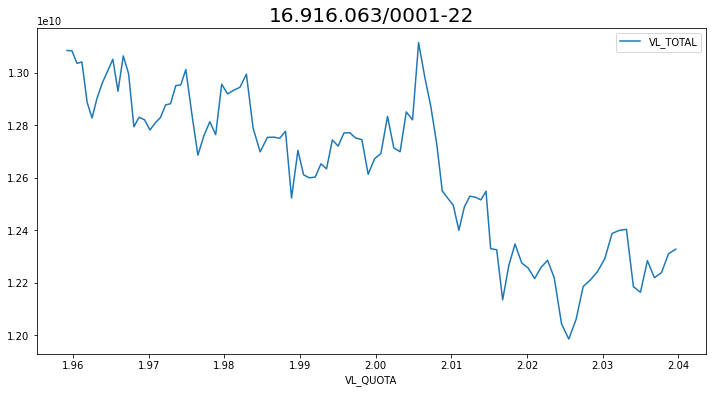

In [6]:
graf4 = fundos[fundos.CNPJ_FUNDO == fundos.CNPJ_FUNDO.unique()[3]].plot.line(x = 'VL_QUOTA', y = 'VL_TOTAL', figsize = (12, 6))
graf4.set_title(f'{fundos.CNPJ_FUNDO.unique()[3]}', fontsize = 20)